In [0]:
#https://www.tensorflow.org/tutorials/keras/classification

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


TensorFlow 2.x selected.
2.1.0-rc1


In [0]:
fashion_mnist = keras.datasets.fashion_mnist.load_data()

In [4]:
#The array consists of the training images 60000,28,28
#and the test images, 10000,28,28
#and their respective labels
print(fashion_mnist[0][0].shape)
print(fashion_mnist[1][0].shape)

#Labels:
print(fashion_mnist[0][1].shape)
print(fashion_mnist[1][1].shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [0]:
train_images = fashion_mnist[0][0]
train_labels = fashion_mnist[0][1]
test_images = fashion_mnist[1][0]
test_labels = fashion_mnist[1][1]

In [0]:
#Adding the class names to the labels (1-9)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
#@title Preprocess the data


In [7]:
#The data must be preprocessed before training the network. 
#If you inspect the first image in the training set, 
#you will see that the pixel values fall in the range of 0 to 255:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

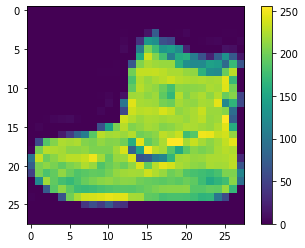

In [8]:
#showing the image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [0]:
#Scale these values to a range of 0 to 1 before feeding them to the neural network model. 
#To do so, divide the values by 255. 
#It's important that the training set and the testing set be preprocessed in the same way:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
#@title Build the model


In [10]:
"""
Set up the layers the basic building block of a neural network is the layer. 
Layers extract representations from the data fed into them.
Hopefully, these representations are meaningful for the problem at hand.
Most of deep learning consists of chaining together simple layers.
Most layers, such as tf.keras.layers.Dense,have parameters that are learned during training.
"""

'\nSet up the layers the basic building block of a neural network is the layer. \nLayers extract representations from the data fed into them.\nHopefully, these representations are meaningful for the problem at hand.\nMost of deep learning consists of chaining together simple layers.\nMost layers, such as tf.keras.layers.Dense,have parameters that are learned during training.\n'

In [0]:
model = keras.Sequential([
    #The input shape is the shape of a single image
    #this also trainsform 28*28 into one single array og 784 (28*28)
    keras.layers.Flatten(input_shape=(28, 28)), #flatten just reformats the data
    keras.layers.Dense(128, activation='relu'), #the 128 is the # of neurons
    keras.layers.Dense(10, activation='softmax') #new layer of neurons
])


In [12]:
#note:
print(model.output_shape)
#is the shape of the output of the last dense layer, 10.
#Because it is softmax, it means it returns the probability scores
#of each category (and it sums to 1).
#eg 1-5%, 2-2%, 3-40%, 4-3%, etc... 
#And it is the probability of belonging to any class

(None, 10)


In [0]:
#@title Compile the model


In [0]:
#Before the model is ready for training, it needs a few more settings.
#These are added during the model's compile step:
"""
Loss function —This measures how accurate the model is during training. 
You want to minimize this function to "steer" the model in the right direction.
Optimizer —This is how the model is updated based on the data it sees and its loss function.
Metrics —Used to monitor the training and testing steps. 
The following example uses accuracy, the fraction of the images that are correctly classified.
"""

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [0]:
#@title Train the model


In [0]:
"""
Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
The model learns to associate images and labels.
You ask the model to make predictions about a test set—in this example, the test_images array. Verify that the predictions match the labels from the test_labels array.
"""

In [16]:
model.fit(train_images, train_labels, epochs=10)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.4993 - accuracy: 0.8243
Epoch 2/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3794 - accuracy: 0.8631
Epoch 3/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3397 - accuracy: 0.8771
Epoch 4/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3151 - accuracy: 0.8856
Epoch 5/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2978 - accuracy: 0.8909
Epoch 6/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2840 - accuracy: 0.8960
Epoch 7/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2709 - accuracy: 0.8996
Epoch 8/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2615 - accuracy: 0.9036
Epoch 9/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2524 - accuracy: 0.9050
Epoch 10/10
60

In [17]:
#Compare how the model does against the test
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


10000/10000 - 0s - loss: 0.3256 - accuracy: 0.8847

Test accuracy: 0.8847


In [0]:
#Now we make predictions
predictions = model.predict(test_images)

In [25]:
print(len(predictions[0]))
print(sum(predictions[0]))
print(np.argmax(predictions[0])) #The predicted category

10
0.9999999870985654
9


In [31]:
#Note: YOU HAVE TO WORK WITH BATCHES,
#You cannot pass only one image as it is, (28*28)
#You have to add the batch:
print(test_images[1].shape) #28,28
#you have to make it 1,28,28  where 1 is the batch number.
image = test_images[1]
#To reshape you can do:
imageReshape = image.reshape(1,28,28)
#or this
imageExpand = np.expand_dims(image,0)
print(image.shape)
print(imageReshape.shape)
print(imageExpand.shape)

(28, 28)
(28, 28)
(1, 28, 28)
(1, 28, 28)


In [0]:
#With this you can predict:
prediction_single_expand = model.predict(imageExpand)
prediction_single_reshape = model.predict(imageReshape)

In [36]:
print(np.argmax(prediction_single_expand[0]))
print(np.argmax(prediction_single_reshape[0]))


2
2
